<a href="https://colab.research.google.com/github/EddyGiusepe/ROC_AUC_mais_um_EXEMPLO/blob/main/ROC_AUC_limiar_de_Producao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretando os resultados do seu modelo

Este Script foi baseado no seguinte Data Scientist: [Vinícius Galvão](https://www.youtube.com/watch?v=YBZHJANH5jY).

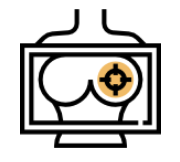

## O que vamos aprender?

- Avaliar o modelo utilizando somente a acurácia é uma boa ideia?
- O que é e como interpretar uma Matriz de Confusão
- Métricas calculadas a partir da matriz de confusão
- Como alterar a performance de um modelo alterando o limiar de predição
- Curva ROC
- AUC

#### Dataset Câncer de Mama:
* 569 instâncias, no qual cada instância representa um tecido mamário;
* 30 atributos, que são representados pelas colunas 2 até a coluna 32;
* As classes das instâncias correspondem se o tumor é maligno ou benigno, representadas pela segunda coluna, a coluna diagnosis;
* Trata-se de um problema de classificação.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Abrindo nosso dataset 
import pandas as pd
cancer = pd.read_csv('/content/drive/MyDrive/Breast-cancer-videos/breast-cancer-wisconsin-data/data.csv', index_col=0)



In [3]:
cancer.shape

(569, 32)

In [4]:
cancer.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
874839,B,12.30,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,0.1667,0.05474,0.2382,0.8355,1.687,18.32,0.005996,0.022120,0.021170,0.006433,0.02025,0.001725,13.35,19.59,86.65,546.7,0.10960,0.16500,0.142300,0.04815,0.2482,0.06306,NaN
916221,B,11.34,18.61,72.76,391.2,0.10490,0.08499,0.043020,0.025940,0.1927,0.06211,0.2430,1.0100,1.491,18.19,0.008577,0.016410,0.020990,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.14830,0.15740,0.162400,0.08542,0.3060,0.06783,NaN
868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.035030,0.028750,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.11900,0.16480,0.139900,0.08476,0.2676,0.06765,NaN
877989,M,17.54,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,0.05491,0.3971,0.8282,3.088,40.73,0.006090,0.025690,0.027130,0.013450,0.01594,0.002658,20.42,25.84,139.50,1239.0,0.13810,0.34200,0.350800,0.19390,0.2928,0.07867,NaN
897137,B,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418,NaN
8711216,B,16.84,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.027710,0.1844,0.05268,0.4789,2.0600,3.479,46.61,0.003443,0.026610,0.030560,0.011100,0.01520,0.001519,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.188200,0.08436,0.2527,0.05972,NaN
895633,M,16.26,21.88,107.50,826.8,0.11650,0.12830,0.179900,0.079810,0.1869,0.06532,0.5706,1.4570,2.961,57.72,0.010560,0.037560,0.058390,0.011860,0.04022,0.006187,17.73,25.21,113.70,975.2,0.14260,0.21160,0.334400,0.10470,0.2736,0.07953,NaN
894604,B,10.25,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,0.1743,0.07279,0.3677,1.4710,1.597,22.68,0.010490,0.042650,0.040040,0.015440,0.02719,0.007596,11.28,20.61,71.53,390.4,0.14020,0.23600,0.189800,0.09744,0.2608,0.09702,NaN
8911164,B,11.89,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875,0.6412,2.2930,4.021,48.84,0.014180,0.014890,0.012670,0.019100,0.02678,0.003002,12.40,18.99,79.46,472.4,0.13590,0.08368,0.071530,0.08946,0.2220,0.06033,NaN


In [5]:
cancer.isnull().sum()


diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [6]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
# Substituir as variáveis categóricas por núméricas
diag = {'M':1, 'B':0}
cancer.diagnosis = [diag[item] for item in cancer.diagnosis]


In [8]:
# Separar os objetos dos atributos e das classes
X = cancer[cancer.columns[1:31]]
y = cancer.diagnosis

In [9]:
# Dividindo X e y em conjunto de treino e de teste
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Treinando o modelo de Regressão Logística com o conjunto de treino
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [11]:
# Fazendo predições da classe das instâncias do conjunto de teste
y_pred = logreg.predict(X_test)

<font color="yellow">**Acurácia de classificação:**</font> porcentagem de predições corretas

In [13]:
# Calculando a acurácia
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9590643274853801


In [24]:
y_test[:15]

id
915691     1
9112367    0
909410     0
892214     0
854941     0
916221     0
90250      0
893783     0
921092     0
898677     0
906564     0
861648     0
905539     0
8711216    0
861598     0
Name: diagnosis, dtype: int64

In [25]:
y_pred[:15]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

<font color="yellow">**Acurácia Nula:**</font> Acurácia alcançada predizendo sempre a classe mais frequente



In [21]:
# Examinando a distribuição das classes do conjunto de teste (Utilizando um método do pandas)
y_test.value_counts()

0    108
1     63
Name: diagnosis, dtype: int64

In [22]:
# Calculando a acurácia nula
print(108/(108+63))

0.631578947368421


<font color="yellow">**Comparando os valores verdadeiros e preditos**</font>

In [23]:
# Visualizando os 15 primeiros resultados verdadeiros e preditos
print(y_test.values[:15])
print(y_pred[:15])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


<font color="yellow">**Conclusão:**</font>

- <font color="orange">Acurácia de classificação é a métrica mais fácil de entender</font>

- <font color="orange">Porém, ela não nos diz nada a respeito da distribução de classes dos valores de resposta</font>

- <font color="orange">Além disso, não nos diz quais tipos de erros nosso classificador está cometendo</font>

## Matriz de confusão

Tabela que descreve a performance de um modelo de classificação

In [26]:
# Importante: primeiro argumento é valor verdadeiro, segundo argumento é valor predito
print(metrics.confusion_matrix(y_test, y_pred))

[[103   5]
 [  2  61]]


![Small confusion matrix](imagens/matriz_confusao.png)

- Cada observação do conjunto de teste está representada em alguma das "caixas" 
- Nesse caso, é uma matriz 2x2, pois temos duas classes possíveis
- O formato apresentado aqui não é universal

**Terminologia**

- **True Positives (TP):** Os verdadeiros positivos, são as predições corretas que o pacientes teve derrame.
- **True Negatives (TN):** Os verdadeiros negativos, são as predições corretas que o paciente não teve derrame.
- **False Positives (FP):** Os falsos positivos, são as predições incorretas de que o paciente teve derrame.
- **False Negatives (FN):** Os falsos negativos, são as predições incorretas de que o paciente não teve derrame.

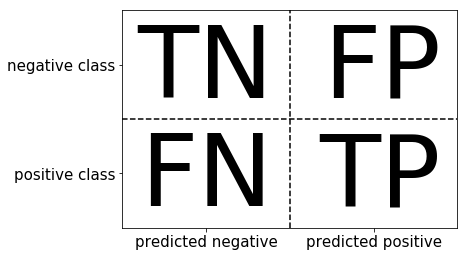

In [ ]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
# Salvando a matriz de confusão e fatiando em 4 pedaços
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

## Métricas calculadas a partir da matriz de confusão

**Acurácia de classificação:** Qual frequente o classificador está correto?

In [ ]:
# Calculando a acurácia de classificação
print((TP+TN)/(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred))

0.9649122807017544
0.9649122807017544


**Sensibilidade:** Quando o valor real é positivo, quão frequente as predições são corretas?


In [ ]:
# Calculando a sensibilidade 
print(TP/(TP+FN))
print(metrics.recall_score(y_test, y_pred))

0.9841269841269841
0.9841269841269841


**Especificidade:** Quando o valor real é negativo, quão frequente as predições são corretas?

In [ ]:
# Calculando a especificidade
print(TN/(TN+FP))

0.9537037037037037


**Conclusão:**

- Matriz de confusão nos fornece uma visão geral de como nosso classificador está performando
- Também permite que você calcule várias métricas de classificação

**Qual métrica eu devo focar?**

- A escolha da métrica depende muito do **objetivo do seu projeto**

- **Filtro de Spam** (a classe positiva é "spam"): Otimize pela precisão ou especificidade, pois os falsos negativos (spam que foram parar na caixa de entrada) são mais aceitáveis que os falsos positivos (emails que não eram spam e foram capturados pelo filtro)

- **Detector de transações fraudulentas** (a classe positiva é "fraude"): Otimize pela sensibilidade, pois os falsos positivos (transações normais que foram rotuladas como uma possível fraude) são mais aceitáveis que os falsos negativos (transações fraudulentas que não foram detectadas)

## Ajustando o limiar de classificação

In [ ]:
# Mostrando as 10 primeiras respostas preditas
logreg.predict(X_test)[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# Mostrando as 10 primeiras probabilidades das respostas preditas relacionadas as classes
logreg.predict_proba(X_test)[:10,1]

array([[7.16058269e-03, 9.92839417e-01],
       [9.68623029e-01, 3.13769708e-02],
       [9.97094581e-01, 2.90541908e-03],
       [7.95653071e-01, 2.04346929e-01],
       [9.99891760e-01, 1.08239539e-04],
       [9.96278415e-01, 3.72158456e-03],
       [9.90222915e-01, 9.77708540e-03],
       [9.97860241e-01, 2.13975894e-03],
       [9.58637559e-01, 4.13624411e-02],
       [9.99673088e-01, 3.26911776e-04]])

In [ ]:
# Armazenando as probabilidades de predição para a classe 1 
y_pred_proba = logreg.predict_proba(X_test)[:,1]

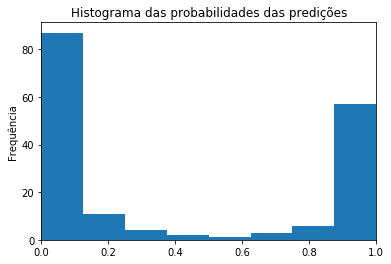

In [ ]:
# Histograma das probabilidades de predição
import matplotlib.pyplot as plt
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histograma das probabilidades das predições')
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Revendo a matriz de confusão (limiar padrão de 0.5)
print(confusion)

[[103   5]
 [  1  62]]


Diminuindo o limiar para predição, aumentamos a sensibilidade do modelo

In [ ]:
# Predizendo diabetes se a probablidade de diabetes for maior que 0.15
from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_prob],0.15)[0]

In [ ]:
# Nova matriz de confusão (limiar de 0.15)
print(metrics.confusion_matrix(y_test, y_pred))

[[93 15]
 [ 0 63]]


In [ ]:
# Sensibilidade foi aumentada (era 0.98)
print(63/(63+0))

1.0


In [ ]:
# Especificidade foi diminuida (era 0.95)
print(93/(93+15))

0.8611111111111112


**Conclusion:**

- Limiar de 0.5 é usado como default (para problemas binários) para converter probabilidades de predição em predição de classes
- Limiar pode ser ajustado aumentando a sensibilidade ou a especificidade
- Sensibilidade e Especificidade são inversamente proporcionais

## ROC Curves e Area Under the Curve (AUC)

Seria legal se a gente conseguisse visualizar como a sensibilidade e especificidade são afetadas por vários limiares, sem ficar tentando um por um?

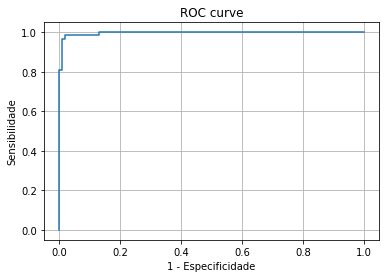

In [ ]:
# IMPORTANTE: o primeiro argumento são os valores verdadeiros, segundo argumento são as probabilidades de predição
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.grid(True)
plt.show()

- Curva ROC pode te ajudar a escolher um limiar que balanceie sensibilidade e esecificidade de um jeito que faça sentido pra o contexto do seu projeto
- Você não pode **ver**, de fato, os limiares usados pra gerar a curva ROC

In [ ]:
# Definindo uma função que recebe um limiar e mostra a sensibilidade e especificidade
def limiar(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
limiar(0.5)

Sensitivity: 0.9841269841269841
Specificity: 0.9814814814814815


In [ ]:
limiar(0.15)

Sensitivity: 1.0
Specificity: 0.8703703703703703


AUC é a porcentagem do gráfico que a curva ocupa.

- AUC é usada como uma métrica que resume a performance do classificador.
- AUC é bastante útil mesmo quando você tem um dataset desbalanceado.

In [ ]:
# Calculando AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.9305555555555556


**Vantagens da Matriz de Confusão:**

- Permite que você calcule uma varidade de métricas*
- Muito útil para problemas multiclasses (mais útil do que para problemas binários)

**Vantagens da curva ROC e AUC:**

- Não é necessário que você configure um limiar de classificação
- Ainda é útil para problemas com classes desbalanceadas

## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Website: http://viniciusgalvaoia.com.br

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()